# Importação de módulos utilizandos durante todo o processamento

In [1]:
#importação de módulos
import pandas as pd
import numpy as np

#Para plotagens
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

In [2]:
# Importando modelos para identificação de outliers
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_regression, SelectKBest, SelectPercentile, mutual_info_classif


In [27]:
#idenficação de outliers utilizando o pacote pyod do python
'''
ref:Zhao, Y., Nasrullah, Z.andLi, Z., 
2019. PyOD: A Python ToolboxforScalable Outlier˓→Detection. arXiv preprint arXiv:1901.01588.
'''

'\nref:Zhao, Y., Nasrullah, Z.andLi, Z., \n2019. PyOD: A Python ToolboxforScalable Outlier˓→Detection. arXiv preprint arXiv:1901.01588.\n'

In [3]:
#Criação de uma variável texto para ir guardando os resultados
outliers=''

# Base de dados

In [ ]:
#Escolha da base de dados

In [4]:
#base de dados contendo todos os dados
dados= pd.read_excel('A_dados.xlsx',sheet_name='todos')
dados_back = dados.copy()

In [5]:
dados = dados_back.copy()



In [167]:
#base de dados contendo todos os dados
#dados = pd.read_excel('A_dados.xlsx',sheet_name='celluclast')
dados = dados[(dados['eenz'] == 'celluclast')]

In [169]:
dados = dados[(dados['experimento'] == 'cell2')]

In [220]:
dados = dados[(dados['eenz'] == 'eeta')] #base de dados do extrato EETA exp 1
dadosB1 = dados[(dados['experimento']=='biof')]


In [227]:
dados = dadosB1.copy()

In [7]:
dados.shape

(1406, 713)

In [6]:
dados.index

RangeIndex(start=0, stop=1406, step=1)

In [8]:
#Separar somente as amostras que contenham todas as atividades enzimáticas
dados = dados.loc[(dados['betaglicosidase'].notnull()) 
                         & (dados['cmcase'].notnull()) 
                         & (dados['fpase'].notnull())
                         &(dados['xilanase'].notnull())]
resultados = '\nTotal geral de amostras com todas as atividades enzimáticas:'+str(dados.shape[0])

In [193]:
#Separar somente as amostras que contenham uma atividade enzimática
#dados = dados.loc[ dados['betaglicosidase'].notnull()]
#dados = dados.loc[dados['cmcase'].notnull()]
#dados = dados.loc[dados['fpase'].notnull()]
dados = dados.loc[dados['xilanase'].notnull()]


In [93]:
dados.shape

(144, 713)

In [25]:
#amostras de cell1
dados = dados[(dados['experimento'] == 'cell1')]

In [9]:
#Resetando o índice dos dados:
dados=dados.reset_index(drop=True)

In [10]:
dados.head(5)

,descricao,1100nm,1102nm,1104nm,1106nm,1108nm,1110nm,1112nm,1114nm,1116nm,...,cmcase,fpase,xilanase,proteinas,eenz,temp,dur,inter,proc,experimento
0,exp2_p0_t1,0.033690,0.034025,0.034302,0.034534,0.034730,0.034908,0.035092,0.035302,0.035555,...,114.800334,50.343581,575.54899,113.040397,celluclast,70,30,0,des,cell2
1,exp2_p0_t2,0.034158,0.033989,0.033937,0.034027,0.034259,0.034608,0.035037,0.035511,0.036002,...,114.800334,50.343581,575.54899,113.040397,celluclast,70,30,0,des,cell2
2,exp2_p0_t3,0.033267,0.033650,0.033960,0.034240,0.034516,0.034807,0.035128,0.035488,0.035893,...,114.800334,50.343581,575.54899,113.040397,celluclast,70,30,0,des,cell2
3,exp2_p1_t1_1,0.033680,0.033531,0.033564,0.033741,0.034018,0.034357,0.034727,0.035112,0.035514,...,90.505314,57.640572,484.13796,68.981810,celluclast,70,30,5,des,cell2
4,exp2_p1_t1_2,0.033632,0.033577,0.033613,0.033735,0.033932,0.034204,0.034556,0.034982,0.035460,...,90.505314,57.640572,484.13796,68.981810,celluclast,70,30,5,des,cell2


In [11]:
dados.index

RangeIndex(start=0, stop=923, step=1)

In [21]:
#Separar somente as amostras que contenham betaglicosidase
dados = dados.loc[(dados['betaglicosidase'].notnull()) ]
resultados = '\nTotal geral de amostras para betaglicosidase:'+str(dados.shape[0])

In [22]:
#Separar somente as amostras que contenham cmcase
dados = dados.loc[(dados['cmcase'].notnull()) ]
resultados = '\nTotal geral de amostras para cmcase:'+str(dados.shape[0])

In [23]:
#Separar somente as amostras que contenham fpase
dados = dados.loc[(dados['fpase'].notnull()) ]
resultados = '\nTotal geral de amostras para fpase:'+str(dados.shape[0])

In [124]:
#Separar somente as amostras que contenham xilanase
dados = dados.loc[(dados['xilanase'].notnull()) ]
resultados = '\nTotal geral de amostras para xilanase:'+str(dados.shape[0])

**variáveis:**

In [12]:
#tratamentos com as 4 atividades
var_ae=['betaglicosidase','cmcase','fpase','xilanase']
#criando vetores com os nomes dos atributos

var_abs_int = np.arange(1100,2496,2)
var_abs_txt=[]
for valor in var_abs_int:
    var_abs_txt += [str(valor)+'nm']

In [229]:
#utilizar variáveis definidas na seleção de atributos

In [150]:
#selecionadas para a base de dados de eeta bio1
var_ae=['betaglicosidase','cmcase','fpase','xilanase']
var_abs_txt =['1104nm', '1106nm', '1108nm', '1110nm', '1112nm', '1114nm', '1116nm', '1118nm', '1120nm', '1122nm', '1124nm', '1126nm', '1210nm', '1212nm', '1216nm', '1218nm', '1220nm', '1222nm', '1224nm', '1226nm', '1228nm', '1230nm', '1232nm', '1234nm', '1236nm', '1238nm', '1240nm', '1242nm', '1244nm', '1246nm', '1248nm', '1250nm', '1252nm', '1254nm', '1256nm', '1258nm', '1260nm', '1262nm', '1264nm', '1266nm', '1268nm', '1270nm', '1272nm', '1274nm', '1276nm', '1278nm', '1280nm', '1282nm', '1284nm', '1286nm', '1288nm', '1290nm', '1292nm', '1294nm', '1334nm', '1336nm', '1338nm', '1340nm', '1342nm', '1344nm', '1348nm', '1350nm', '1352nm', '1354nm', '1356nm', '1358nm', '1360nm', '1362nm', '1364nm', '1366nm', '1368nm', '1370nm', '1372nm', '1374nm', '1376nm', '1378nm', '1380nm', '1382nm', '1384nm', '1386nm', '1388nm', '1390nm', '1392nm', '1394nm', '1396nm', '1398nm', '1400nm', '1402nm', '1404nm', '1406nm', '1408nm', '1410nm', '1412nm', '1414nm', '1416nm', '1418nm', '1420nm', '1424nm', '1456nm', '1458nm', '1460nm', '1462nm', '1464nm', '1466nm', '1468nm', '1470nm', '1472nm', '1474nm', '1476nm', '1478nm', '1480nm', '1482nm', '1484nm', '1486nm', '1488nm', '1490nm', '1492nm', '1494nm', '1496nm', '1498nm', '1500nm', '1502nm', '1504nm', '1506nm', '1508nm', '1510nm', '1512nm', '1514nm', '1516nm', '1518nm', '1520nm', '1522nm', '1524nm', '1526nm', '1528nm', '1530nm', '1532nm', '1534nm', '1536nm', '1538nm', '1540nm', '1542nm', '1544nm', '1546nm', '1548nm', '1550nm', '1552nm', '1554nm', '1556nm', '1558nm', '1560nm', '1562nm', '1564nm', '1566nm', '1568nm', '1570nm', '1572nm', '1574nm', '1576nm', '1578nm', '1580nm', '1582nm', '1584nm', '1586nm', '1588nm', '1590nm', '1592nm', '1594nm', '1596nm', '1598nm', '1600nm', '1602nm', '1604nm', '1606nm', '1608nm', '1610nm', '1612nm', '1614nm', '1616nm', '1618nm', '1620nm', '1622nm', '1624nm', '1626nm', '1628nm', '1630nm', '1632nm', '1634nm', '1636nm', '1638nm', '1640nm', '1642nm', '1644nm', '1646nm', '1648nm', '1650nm', '1652nm', '1654nm', '1656nm', '1658nm', '1660nm', '1662nm', '1664nm', '1666nm', '1668nm', '1670nm', '1672nm', '1674nm', '1676nm', '1678nm', '1680nm', '1682nm', '1684nm', '1686nm', '1688nm', '1690nm', '1692nm', '1694nm', '1696nm', '1698nm', '1700nm', '1702nm', '1706nm', '1710nm', '1724nm', '1822nm', '1824nm', '1826nm', '1828nm', '1830nm', '1832nm', '1834nm', '1838nm', '1840nm', '1842nm', '1844nm', '1846nm', '1848nm', '1850nm', '1852nm', '1854nm', '1856nm', '1858nm', '1860nm', '1862nm', '1864nm', '2024nm', '2050nm', '2060nm', '2062nm', '2064nm', '2066nm', '2076nm', '2086nm', '2088nm', '2090nm', '2092nm', '2094nm', '2096nm', '2098nm', '2100nm', '2102nm', '2104nm', '2106nm', '2108nm', '2114nm', '2122nm', '2124nm']
len(var_abs_txt)

268

In [77]:
#tratamentos para uma atividade
var_ae=['xilanase']
#criando vetores com os nomes dos atributos

var_abs_int = np.arange(1100,2496,2)
var_abs_txt=[]
for valor in var_abs_int:
    var_abs_txt += [str(valor)+'nm']

In [194]:
#variáveis importantes para xilanase (identificadas na seleção de atributos):
var_ae=['xilanase']
var_abs_txt=['1668nm', '1666nm', '1664nm', '1500nm', '1662nm', '1660nm',
       '1670nm', '1468nm', '1496nm', '1498nm', '1502nm', '1504nm',
       '1518nm', '1352nm', '1494nm', '1506nm', '1414nm', '1422nm',
       '1672nm', '1658nm', '1114nm', '1478nm', '1480nm', '1516nm',
       '1466nm', '1492nm', '1470nm', '1354nm', '1420nm', '1348nm',
       '1790nm', '1416nm', '1350nm', '1682nm', '1484nm', '1464nm',
       '1482nm', '1712nm', '1566nm', '1588nm', '1674nm', '1786nm',
       '1564nm', '1488nm', '1710nm', '1112nm', '1520nm', '1684nm',
       '1356nm', '1788nm', '1568nm', '1586nm', '1652nm', '1562nm',
       '1726nm', '1792nm', '1418nm', '1412nm', '1474nm', '1676nm',
       '1490nm', '1590nm', '1306nm', '1680nm', '1486nm', '2172nm',
       '1508nm', '1476nm', '1650nm', '1528nm', '1654nm', '1472nm',
       '1560nm', '1372nm', '1116nm', '2026nm', '1264nm', '1794nm',
       '1424nm', '1362nm', '1374nm', '1592nm', '1614nm', '1238nm',
       '1526nm', '2044nm', '1728nm', '1460nm', '1328nm', '1784nm',
       '1162nm', '1624nm', '1160nm', '1692nm', '1616nm', '1686nm',
       '1656nm', '1268nm', '1236nm', '1626nm', '1358nm', '1640nm',
       '1360nm', '1380nm', '1522nm', '1458nm', '1690nm', '2178nm',
       '1462nm', '1142nm', '1698nm', '1234nm', '1630nm', '1584nm',
       '1510nm', '1514nm', '1678nm', '1570nm', '1270nm', '1730nm',
       '1714nm', '1144nm', '1370nm', '1628nm', '1274nm', '1724nm',
       '1688nm', '1512nm', '1594nm', '2206nm', '1538nm', '1536nm',
       '1266nm', '1696nm', '1146nm', '1708nm', '1108nm', '1550nm',
       '1700nm', '1582nm', '1556nm', '1620nm', '1638nm', '1632nm',
       '1304nm', '1364nm', '1694nm', '1622nm', '1110nm', '1534nm',
       '1732nm', '1272nm', '1558nm', '1540nm', '1368nm', '1524nm',
       '1542nm', '1410nm', '1648nm', '1782nm', '1796nm', '1552nm',
       '1704nm', '1612nm', '1346nm', '1530nm', '1720nm', '2042nm',
       '1580nm', '1798nm', '1532nm', '1578nm', '1718nm', '1148nm',
       '1646nm', '1572nm', '1554nm', '1366nm', '1722nm', '1618nm',
       '2180nm', '1634nm', '1376nm', '2208nm', '1544nm', '1100nm',
       '2218nm', '1604nm', '1140nm', '1122nm', '1642nm', '1382nm',
       '1378nm', '2046nm', '2258nm', '1120nm', '1804nm', '2170nm',
       '1548nm', '1158nm', '1602nm', '1118nm', '1644nm', '1636nm',
       '1780nm', '1240nm', '1156nm', '1164nm', '1734nm', '1226nm',
       '1606nm', '1102nm']

In [13]:
#Definindo os dataFrames iniciais para começar o processamento
df_x = dados.loc[:,var_abs_txt] #absorbâncias
df_y = dados.loc[:,var_ae]#AE
#df = dados.loc[:,var_abs_txt+var_ae]

In [65]:
print( df_x.shape, df_y.shape)

(144, 698) (144, 4)


In [19]:
df_yb = dados.loc[:,'betaglicosidase']
df_yc = dados.loc[:,'cmcase']
df_yf = dados.loc[:,'fpase']
df_yx = dados.loc[:,'xilanase']

In [ ]:
#tira o comentáro da linha correspondente à atividade em análise
#df_x = df_yb.copy
#df_x = df_yc.copy
#df_x = df_yf.copy
#df_x = df_yx.copy

In [77]:
#lista todas as amostras que foram separadas do suconjunto de experimentos
dados_cell4 = dados[ dados['experimento'] == 'cell4']
dados_cell3 = dados[ dados['experimento'] == 'cell3']
dados_cell5 = dados[ dados['experimento'] == 'cell5']
dados_cell6 = dados[ dados['experimento'] == 'cell6']
dados_cell7 = dados[ dados['experimento'] == 'cell7']

In [79]:
#Definindo os dataFrames iniciais para começar o processamento
df_x = dados_cell4.loc[:,var_abs_txt] #absorbâncias
df_y = dados_cell4.loc[:,var_ae]#AE
#df = dados.loc[:,var_abs_txt+var_ae]

# Análise incial da base de dados e de seu conteúdo através de PCA

In [16]:
#utilizar o PCA para reduzir as dimensões e poder analisar os dados
#Para utilizar o PCA é necessário realizar a normalização dos dados (tornar a variância unitária)
#pré-processamento
scaler = StandardScaler()
scaler.fit(df_x)
df_x_scaler = scaler.transform(df_x)

In [17]:
pca = PCA(n_components=5)

In [18]:
#treinar o pca com os dados padronizados
pca.fit(df_x_scaler)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [19]:
#Após treinar o pca, agora posso transformar os dados
x_pca = pca.transform(df_x_scaler)
print('Dados originais:',df_x.shape,'Pós PCA:', x_pca.shape)

Dados originais: (98, 354) Pós PCA: (98, 5)


In [20]:
#Exibindo a variância explicada pelas componentes principais
variancia_explicada = pca.explained_variance_ratio_[:10]

In [21]:
variancia_explicada

array([0.8029613 , 0.17945454, 0.00313063, 0.00169942, 0.00145171])

/home/amanda/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


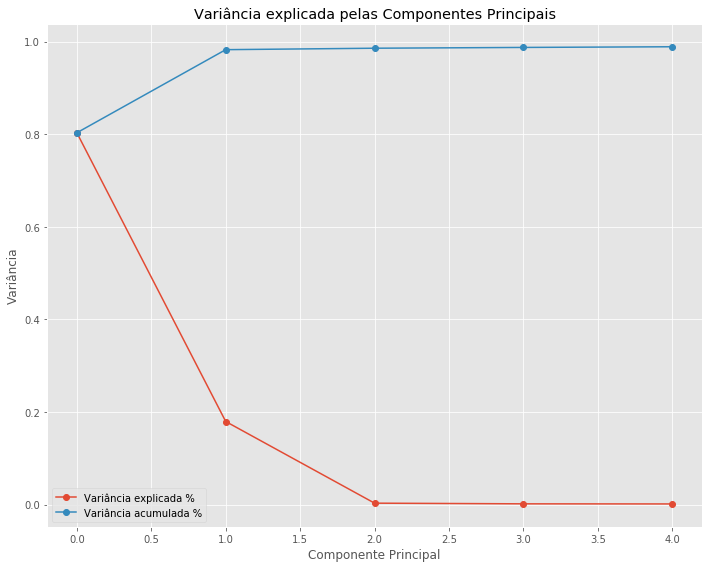

In [22]:
# Explicação da variância pelas componentes principais
with plt.style.context(('ggplot')):
    fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
    fig.set_tight_layout(True)

    ax1.plot(variancia_explicada,'-o', label="Variância explicada %")
    ax1.plot(np.cumsum(variancia_explicada),'-o', label = 'Variância acumulada %')
    ax1.set_xlabel("Componente Principal")
    ax1.set_ylabel("Variância")

    ax1.set_title('Variância explicada pelas Componentes Principais')    
    plt.legend()
    plt.show()  

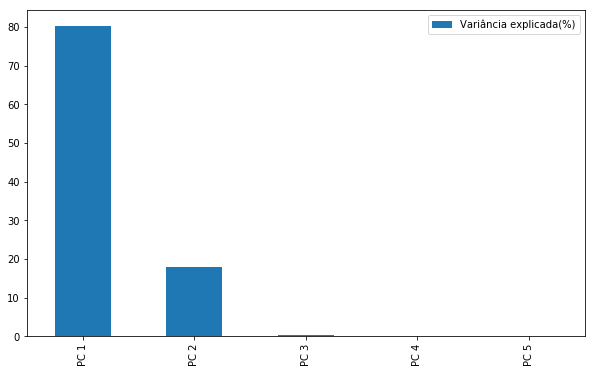

In [23]:
perc = pca.explained_variance_ratio_ * 100
perc = pd.DataFrame(perc, columns=['Variância explicada(%)'], index=['PC %s' % pc for pc in np.arange(len(perc)) + 1])
ax = perc.plot(kind='bar', figsize=(10,6))

    

In [24]:
perc['Variância acumulada(%)'] = np.cumsum(pca.explained_variance_ratio_[:21])
perc

,Variância explicada(%),Variância acumulada(%)
PC 1,80.296130,0.802961
PC 2,17.945454,0.982416
PC 3,0.313063,0.985546
PC 4,0.169942,0.987246
PC 5,0.145171,0.988698


In [341]:
loadings = pd.DataFrame(pca.components_.T)

In [342]:
loadings.index = ['A %s' % pc for pc in loadings.index + 1]
loadings.columns = ['PC %s' % pc for pc in loadings.columns + 1]
marker = dict(linestyle='none', marker='o', markersize=7, color='blue', alpha=0.5)
PCs = np.dot(loadings.values.T, df_x.T)
PCs.shape, df_x.shape, loadings.shape

((5, 81), (81, 399), (399, 5))

/home/amanda/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


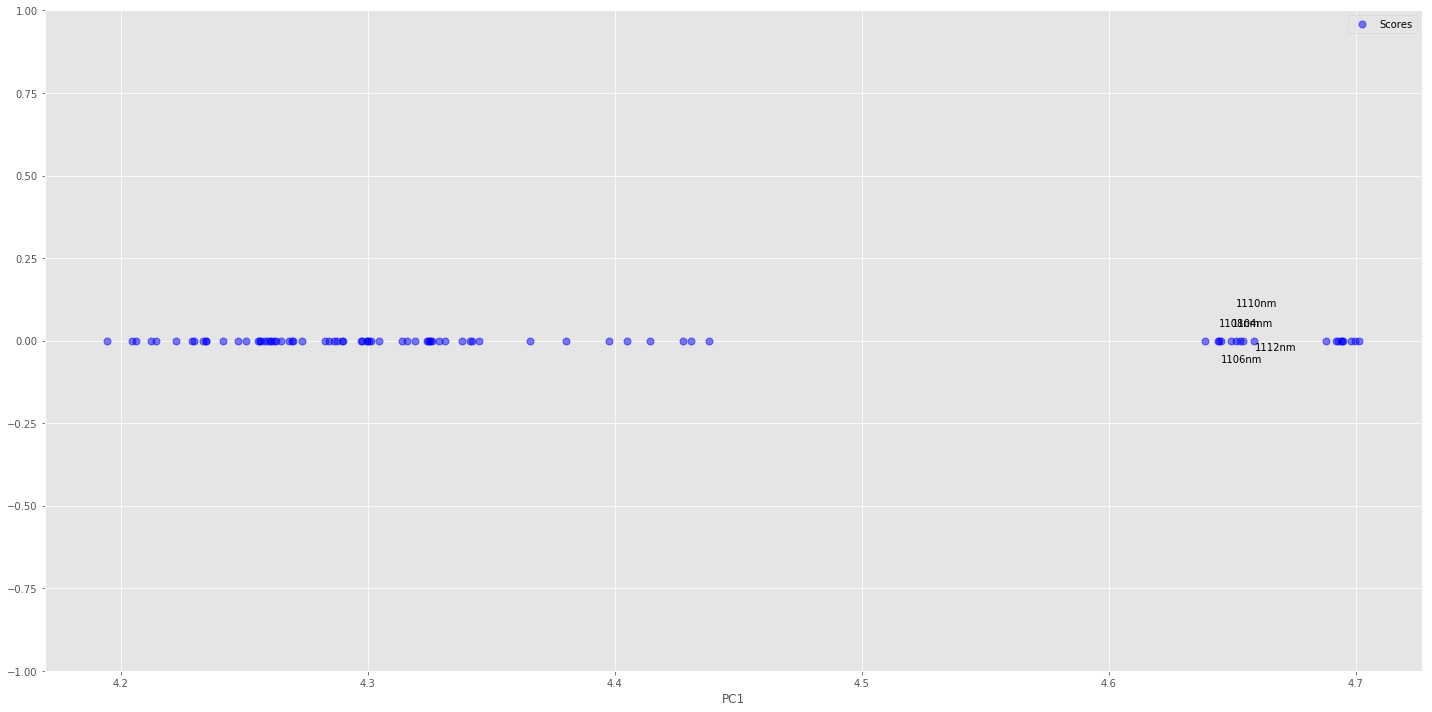

In [343]:
with plt.style.context(('ggplot')):
    fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
    fig.set_tight_layout(True)
    
    ax1.plot(PCs[0],np.zeros_like(PCs[0]), 
             label="Scores", **marker )
    [ax1.text(x, y, t) for x, y, t in zip(PCs[0], loadings.values[1, :], df_x.columns)]

    ax1.set_xlabel("PC1")
    _=ax1.set_ylim(-1,1)  
    plt.legend()
    plt.show()  

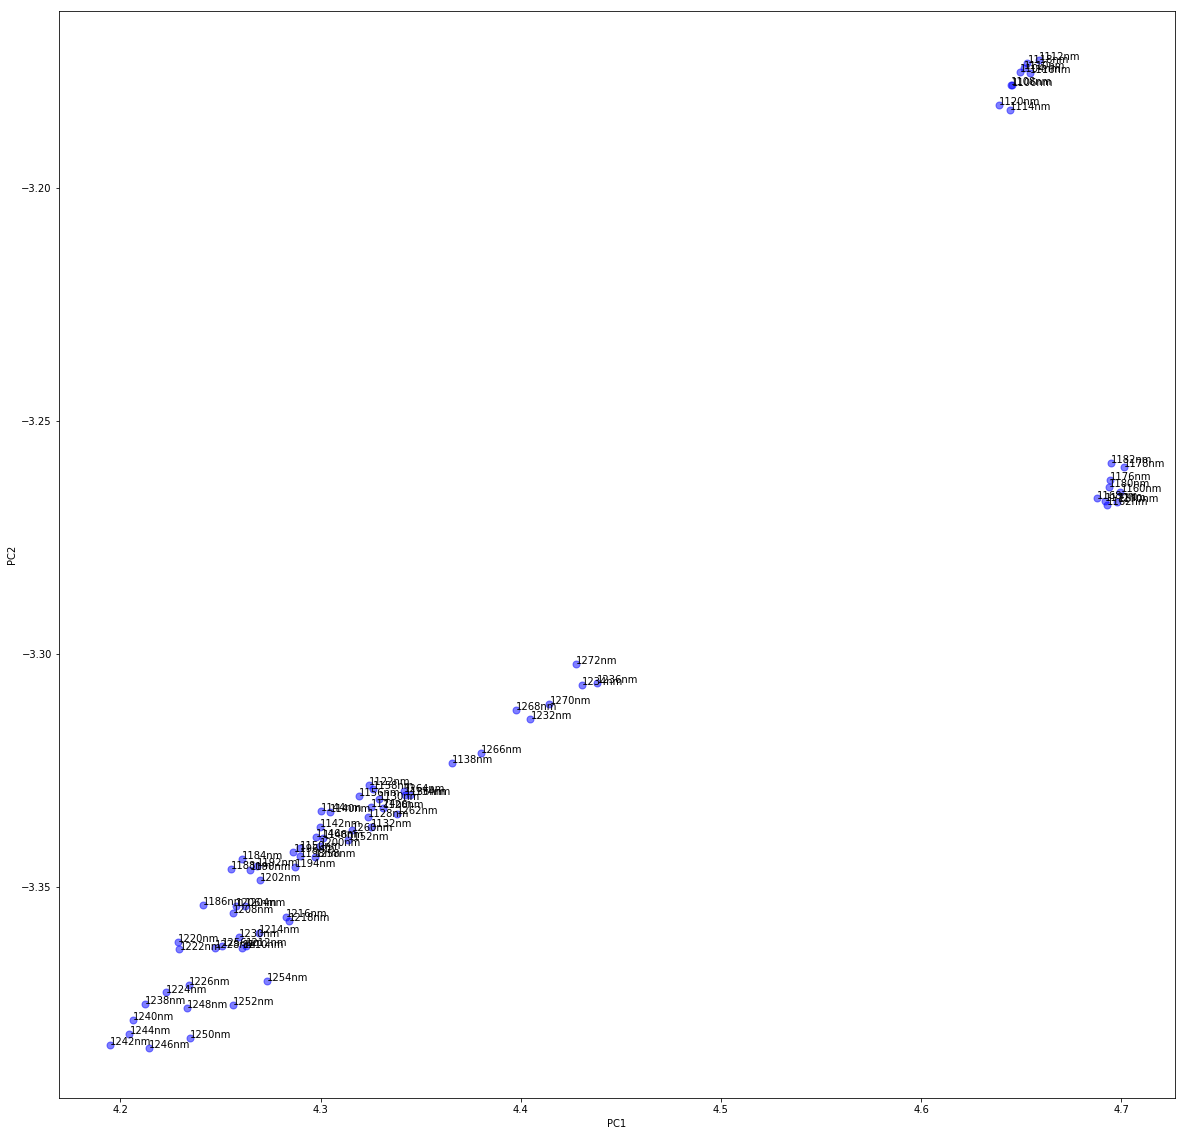

In [326]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.plot(PCs[0], PCs[1], label="Scores", **marker)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

text = [ax.text(x, y, t) for x, y, t in
        zip(PCs[0], PCs[1], df_x.columns)]
   

In [25]:
temp_yinter = dados.loc[:,'inter']
temp_ye = dados.loc[:,'eenz']
temp_yt = dados.loc[:,'temp']
temp_yex = dados.loc[:,'experimento']

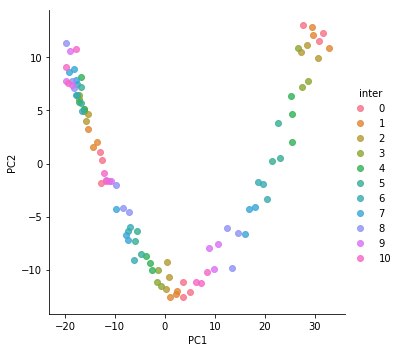

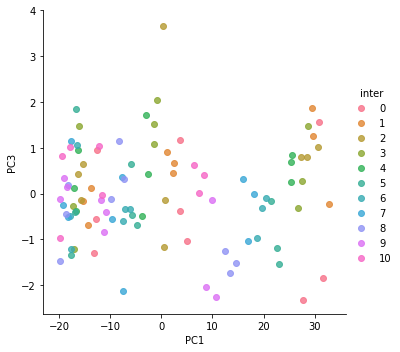

In [26]:
dados_plot = pd.DataFrame(zip(x_pca[:,0],x_pca[:,1],temp_yinter), columns=["PC1", "PC2", "inter"])
sns.lmplot("PC1", "PC2", dados_plot, hue="inter", fit_reg=False)
plt.rcParams['figure.figsize']=(15,10)

dados_plot = pd.DataFrame(zip(x_pca[:,0],x_pca[:,2],temp_yinter), columns=["PC1", "PC3", "inter"])
sns.lmplot("PC1", "PC3", dados_plot, hue="inter", fit_reg=False)
plt.rcParams['figure.figsize']=(15,10)

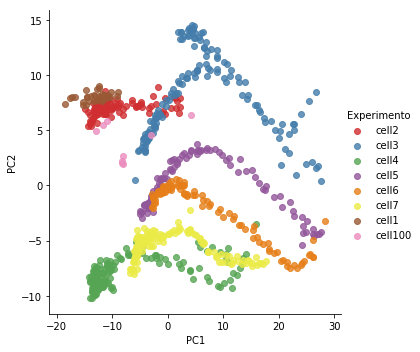

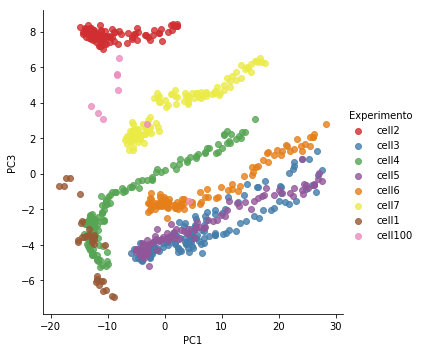

In [107]:

dados_plot = pd.DataFrame(zip(x_pca[:,0],x_pca[:,1],temp_yex), columns=["PC1", "PC2", "Experimento"])

with sns.color_palette("Set1", n_colors=13,desat =.8):
    plt.rcParams['figure.figsize']=(15,10)
    sns.set_style()
    sns.lmplot("PC1", "PC2", dados_plot, hue="Experimento", fit_reg=False)
    plt.rcParams['figure.figsize']=(15,10)


    dados_plot = pd.DataFrame(zip(x_pca[:,0],x_pca[:,2],temp_yex), columns=["PC1", "PC3", "Experimento"])
    sns.lmplot("PC1", "PC3", dados_plot, hue="Experimento", fit_reg=False)
    plt.rcParams['figure.figsize']=(15,10)

# Decições após análise

In [55]:
dadosback = dados.copy()


In [56]:
#Separação de subconjunto de dados
dados_cell4 = dados_plot[(dados_plot['Experimento'] == 'cell4')]

In [57]:
dados_cell4.shape

(144, 3)

In [58]:
print(dados_cell4.index)

Int64Index([237, 238, 239, 240, 241, 242, 243, 244, 245, 246,
            ...
            371, 372, 373, 374, 375, 376, 377, 378, 379, 380],
           dtype='int64', length=144)


In [60]:
dados_cell4 = dados.iloc[list(dados_cell4.index)]

In [63]:
dados = dados_cell4.copy()

In [47]:
print(dados.index)

Int64Index([839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851,
            852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864,
            865, 866, 867, 868, 869, 870, 871],
           dtype='int64')


In [14]:
#iniciar
#pré-processamento:
#Encontrando outliers após pre-processamento dos dados:
from sklearn import preprocessing

scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(df_x)
#x_out_t = pd.DataFrame(robust_scaled_df, columns=[var_abs_txt+var_ae])
x_out_t = pd.DataFrame(robust_scaled_df, columns=[var_abs_txt])
x = x_out_t.copy()  #linha para executar após realizar préproc

In [15]:
# Define sete ferramentas para detecção de outliers para serem comparadas.
random_state = np.random.RandomState(42)
outliers_fraction = 0.05  #5% de amostras que não são similares às restantes
classifiers = {'Angle-based Outlier Detector (ABOD)': ABOD(contamination=outliers_fraction),
               'Cluster-based Local Outlier Factor (CBLOF)':CBLOF(contamination=outliers_fraction,check_estimator=False, random_state=random_state),
               'Feature Bagging':FeatureBagging(LOF(n_neighbors=35),contamination=outliers_fraction,check_estimator=False,random_state=random_state),
               'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
               'Isolation Forest': IForest(contamination=outliers_fraction,random_state=random_state),
               'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),
               'Average KNN': KNN(method='mean',contamination=outliers_fraction)}

In [16]:
#testando os algoritmos para os dados de entrada
#criando uma variável para cálculo do tempo de execução do algoritmo
import time
tempo = {}
#navegando sobre todos os métodos de detecção de outliers
print('Iniciando o processamento')
lista_outliers = {}
for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf = clf
    inicio=time.time() #contando o tempo de processamento
    clf.fit(x)
    previsoes = clf.labels_
    confianca_previsoes = clf.decision_scores_
    outliers = []
    for i in range(len(previsoes)):
        if previsoes[i] == 1:
            outliers.append(i)        
    lista_outliers[clf_name] = dados.iloc[outliers, :]
    fim =time.time() #finalizando a contagem
    #input('Digite enter para seguir para o próximo processamento!')
    tempo[clf_name] = fim-inicio
print('Processamento finalizado.')  

#construindo um dataFrame com os resultados
indices = range(0,len(outliers))
df_out = pd.DataFrame({}, index = indices)
for k,v in lista_outliers.items():
    df_out[k] = pd.Series(list(v.index),index=indices)

Iniciando o processamento


/home/amanda/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


Processamento finalizado.


In [17]:
df_out

,Angle-based Outlier Detector (ABOD),Cluster-based Local Outlier Factor (CBLOF),Feature Bagging,Histogram-base Outlier Detection (HBOS),Isolation Forest,K Nearest Neighbors (KNN),Average KNN
0,0,6,0,6,6,0,0
1,6,24,2,23,8,3,3
2,35,39,3,710,23,6,6
3,38,728,4,711,29,7,8
4,39,729,5,712,147,8,9
5,75,730,6,713,148,9,18
6,82,731,23,716,710,18,23
7,124,732,124,731,711,23,24
8,147,733,147,735,712,29,29
9,189,735,189,746,713,31,31


In [18]:
tempo_out = pd.Series(list(tempo.values()), index=tempo.keys())

REMOÇÃO DE OUTLIERS: 
TEMPO DE PROC:


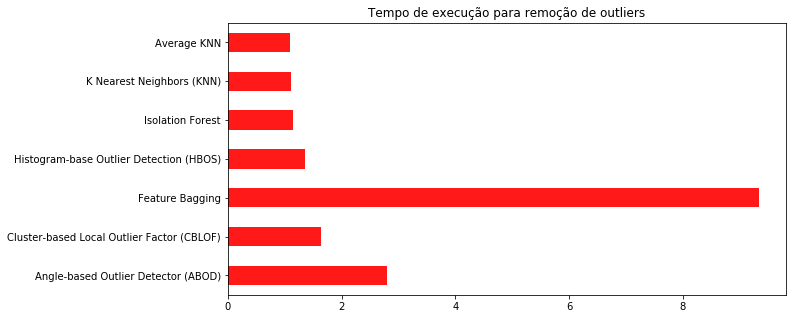

In [19]:
#comparando resulados dos algoritmos para determinação de outliers
print('REMOÇÃO DE OUTLIERS: ')
print('TEMPO DE PROC:')
tempo_out.plot(figsize=(10,5),
              title ='Tempo de execução para remoção de outliers',
              kind='barh', alpha=.9, color='r' )

In [20]:
result_out = df_out.apply(pd.value_counts).fillna(0)
result_out

,Angle-based Outlier Detector (ABOD),Cluster-based Local Outlier Factor (CBLOF),Feature Bagging,Histogram-base Outlier Detection (HBOS),Isolation Forest,K Nearest Neighbors (KNN),Average KNN
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,0.0,1.0,1.0,1.0
9,0.0,0.0,0.0,0.0,0.0,1.0,1.0
18,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [23]:
totalModelos = 4
soma_out =[]
for i in range(len(result_out)):
    soma_out.append(result_out.iloc[i,:].sum())
soma = pd.Series(soma_out,index = list(result_out.index))
print('Outliers que se repetem em pelo menos %d modelos:\n'%totalModelos)
print('amostra    Rep')
r=soma[soma>=totalModelos]
r

Outliers que se repetem em pelo menos 4 modelos:

amostra    Rep


0      4.0
6      7.0
23     5.0
39     4.0
124    4.0
147    5.0
189    4.0
215    4.0
689    4.0
711    4.0
714    4.0
716    5.0
718    5.0
737    4.0
739    4.0
783    4.0
884    4.0
918    4.0
dtype: float64

In [24]:
list(r.index)


[0,
 6,
 23,
 39,
 124,
 147,
 189,
 215,
 689,
 711,
 714,
 716,
 718,
 737,
 739,
 783,
 884,
 918]

In [25]:
len(list(r.index))

18

In [26]:
#visualizar amostra que é outlier
print('Amostras que foram classificadas como outliers:')
for valor in list(r.index):
    print('índice:',valor,'descrição:',dados.loc[valor][0], 'intervalo(minutos):',dados.loc[valor][-3])

Amostras que foram classificadas como outliers:
índice: 0 descrição: exp2_p0_t1 intervalo(minutos): 0
índice: 6 descrição: exp2_p1_t2_1 intervalo(minutos): 5
índice: 23 descrição: exp2_p2_t2_3 intervalo(minutos): 10
índice: 39 descrição: exp2_p3_t3_1 intervalo(minutos): 15
índice: 124 descrição: exp3_t1_p10_2 intervalo(minutos): 10
índice: 147 descrição: exp3_t2_p02_1 intervalo(minutos): 2
índice: 189 descrição: exp3_t3_p00_1 intervalo(minutos): 0
índice: 215 descrição: exp3_t3_p08_3 intervalo(minutos): 8
índice: 689 descrição: exp7_t4_p04_1 intervalo(minutos): 4
índice: 711 descrição: bio_p0_t1_2 intervalo(minutos): 0
índice: 714 descrição: bio_p0_t2_2 intervalo(minutos): 0
índice: 716 descrição: bio_p0_t3_1 intervalo(minutos): 0
índice: 718 descrição: bio_p0_t3_3 intervalo(minutos): 0
índice: 737 descrição: bio_p3_t1_1 intervalo(minutos): 72
índice: 739 descrição: bio_p3_t1_3 intervalo(minutos): 72
índice: 783 descrição: bio_p8_t1_2 intervalo(minutos): 192
índice: 884 descrição: ctec

In [27]:
df_out

,Angle-based Outlier Detector (ABOD),Cluster-based Local Outlier Factor (CBLOF),Feature Bagging,Histogram-base Outlier Detection (HBOS),Isolation Forest,K Nearest Neighbors (KNN),Average KNN
0,0,6,0,6,6,0,0
1,6,24,2,23,8,3,3
2,35,39,3,710,23,6,6
3,38,728,4,711,29,7,8
4,39,729,5,712,147,8,9
5,75,730,6,713,148,9,18
6,82,731,23,716,710,18,23
7,124,732,124,731,711,23,24
8,147,733,147,735,712,29,29
9,189,735,189,746,713,31,31


In [28]:
l = list(r.keys())
print('RESULTADO REMOÇÃO DE OUTLIERS : -------------------------------\n')
print('Escolha de outliers definida pela identificação dos mesmos por pelo menos %d métodos distintos'%totalModelos)
print('\nOutliers indentificados na base: ')
print('Total: ',len(l) )
print(l)
print('\n-----------------------------------------------------\n')

RESULTADO REMOÇÃO DE OUTLIERS : -------------------------------

Escolha de outliers definida pela identificação dos mesmos por pelo menos 4 métodos distintos

Outliers indentificados na base: 
Total:  18
[0, 6, 23, 39, 124, 147, 189, 215, 689, 711, 714, 716, 718, 737, 739, 783, 884, 918]

-----------------------------------------------------



In [29]:
#imprimindo as amostras consideradas outliers:
print('índice: Amostra: \t experimento \t temperatura \t intervalo')
for valor in l:
    print(valor,':',dados.values[:][0],' ', dados.values[valor][-1],'  ' , dados.values[valor][-5],'  ', dados.values[valor][-3])

índice: Amostra: 	 experimento 	 temperatura 	 intervalo
0 : ['exp2_p0_t1' 0.0336900074675681 0.0340250745943764 0.0343016716584964
 0.0345341039700686 0.0347297554942232 0.0349077322543046
 0.0350923632511439 0.0353022344906274 0.0355545364881426
 0.0358707997590756 0.036275736664375 0.0367922149639343
 0.0374322953572134 0.0381943047967757 0.0390706529065071
 0.0400569745931269 0.0411560032574062 0.042370527384991
 0.0436925911250138 0.045105677292779 0.0465961843981847
 0.0481615404490926 0.0498083520323524 0.0515358090360331
 0.053319156975225 0.0551167783549266 0.0568916843231677
 0.0586250944712828 0.0603194433874211 0.0619879380991923
 0.0636343305213926 0.0652448751443043 0.0667935530232558
 0.0682500193467197 0.069594363451844 0.0708273621340272
 0.0719641624648137 0.0730223009522213 0.0740109024478276
 0.0749254909534557 0.0757537166526407 0.0764838460995935
 0.0771074950963035 0.077620886096251 0.078030081345718 0.0783526881439634
 0.0786095049764114 0.0788153344845021 0.078

23 : ['exp2_p0_t1' 0.0336900074675681 0.0340250745943764 0.0343016716584964
 0.0345341039700686 0.0347297554942232 0.0349077322543046
 0.0350923632511439 0.0353022344906274 0.0355545364881426
 0.0358707997590756 0.036275736664375 0.0367922149639343
 0.0374322953572134 0.0381943047967757 0.0390706529065071
 0.0400569745931269 0.0411560032574062 0.042370527384991
 0.0436925911250138 0.045105677292779 0.0465961843981847
 0.0481615404490926 0.0498083520323524 0.0515358090360331
 0.053319156975225 0.0551167783549266 0.0568916843231677
 0.0586250944712828 0.0603194433874211 0.0619879380991923
 0.0636343305213926 0.0652448751443043 0.0667935530232558
 0.0682500193467197 0.069594363451844 0.0708273621340272
 0.0719641624648137 0.0730223009522213 0.0740109024478276
 0.0749254909534557 0.0757537166526407 0.0764838460995935
 0.0771074950963035 0.077620886096251 0.078030081345718 0.0783526881439634
 0.0786095049764114 0.0788153344845021 0.0789765575095387
 0.0790940372239266 0.0791696067695041 0.0

124 : ['exp2_p0_t1' 0.0336900074675681 0.0340250745943764 0.0343016716584964
 0.0345341039700686 0.0347297554942232 0.0349077322543046
 0.0350923632511439 0.0353022344906274 0.0355545364881426
 0.0358707997590756 0.036275736664375 0.0367922149639343
 0.0374322953572134 0.0381943047967757 0.0390706529065071
 0.0400569745931269 0.0411560032574062 0.042370527384991
 0.0436925911250138 0.045105677292779 0.0465961843981847
 0.0481615404490926 0.0498083520323524 0.0515358090360331
 0.053319156975225 0.0551167783549266 0.0568916843231677
 0.0586250944712828 0.0603194433874211 0.0619879380991923
 0.0636343305213926 0.0652448751443043 0.0667935530232558
 0.0682500193467197 0.069594363451844 0.0708273621340272
 0.0719641624648137 0.0730223009522213 0.0740109024478276
 0.0749254909534557 0.0757537166526407 0.0764838460995935
 0.0771074950963035 0.077620886096251 0.078030081345718 0.0783526881439634
 0.0786095049764114 0.0788153344845021 0.0789765575095387
 0.0790940372239266 0.0791696067695041 0.

189 : ['exp2_p0_t1' 0.0336900074675681 0.0340250745943764 0.0343016716584964
 0.0345341039700686 0.0347297554942232 0.0349077322543046
 0.0350923632511439 0.0353022344906274 0.0355545364881426
 0.0358707997590756 0.036275736664375 0.0367922149639343
 0.0374322953572134 0.0381943047967757 0.0390706529065071
 0.0400569745931269 0.0411560032574062 0.042370527384991
 0.0436925911250138 0.045105677292779 0.0465961843981847
 0.0481615404490926 0.0498083520323524 0.0515358090360331
 0.053319156975225 0.0551167783549266 0.0568916843231677
 0.0586250944712828 0.0603194433874211 0.0619879380991923
 0.0636343305213926 0.0652448751443043 0.0667935530232558
 0.0682500193467197 0.069594363451844 0.0708273621340272
 0.0719641624648137 0.0730223009522213 0.0740109024478276
 0.0749254909534557 0.0757537166526407 0.0764838460995935
 0.0771074950963035 0.077620886096251 0.078030081345718 0.0783526881439634
 0.0786095049764114 0.0788153344845021 0.0789765575095387
 0.0790940372239266 0.0791696067695041 0.

689 : ['exp2_p0_t1' 0.0336900074675681 0.0340250745943764 0.0343016716584964
 0.0345341039700686 0.0347297554942232 0.0349077322543046
 0.0350923632511439 0.0353022344906274 0.0355545364881426
 0.0358707997590756 0.036275736664375 0.0367922149639343
 0.0374322953572134 0.0381943047967757 0.0390706529065071
 0.0400569745931269 0.0411560032574062 0.042370527384991
 0.0436925911250138 0.045105677292779 0.0465961843981847
 0.0481615404490926 0.0498083520323524 0.0515358090360331
 0.053319156975225 0.0551167783549266 0.0568916843231677
 0.0586250944712828 0.0603194433874211 0.0619879380991923
 0.0636343305213926 0.0652448751443043 0.0667935530232558
 0.0682500193467197 0.069594363451844 0.0708273621340272
 0.0719641624648137 0.0730223009522213 0.0740109024478276
 0.0749254909534557 0.0757537166526407 0.0764838460995935
 0.0771074950963035 0.077620886096251 0.078030081345718 0.0783526881439634
 0.0786095049764114 0.0788153344845021 0.0789765575095387
 0.0790940372239266 0.0791696067695041 0.

714 : ['exp2_p0_t1' 0.0336900074675681 0.0340250745943764 0.0343016716584964
 0.0345341039700686 0.0347297554942232 0.0349077322543046
 0.0350923632511439 0.0353022344906274 0.0355545364881426
 0.0358707997590756 0.036275736664375 0.0367922149639343
 0.0374322953572134 0.0381943047967757 0.0390706529065071
 0.0400569745931269 0.0411560032574062 0.042370527384991
 0.0436925911250138 0.045105677292779 0.0465961843981847
 0.0481615404490926 0.0498083520323524 0.0515358090360331
 0.053319156975225 0.0551167783549266 0.0568916843231677
 0.0586250944712828 0.0603194433874211 0.0619879380991923
 0.0636343305213926 0.0652448751443043 0.0667935530232558
 0.0682500193467197 0.069594363451844 0.0708273621340272
 0.0719641624648137 0.0730223009522213 0.0740109024478276
 0.0749254909534557 0.0757537166526407 0.0764838460995935
 0.0771074950963035 0.077620886096251 0.078030081345718 0.0783526881439634
 0.0786095049764114 0.0788153344845021 0.0789765575095387
 0.0790940372239266 0.0791696067695041 0.

718 : ['exp2_p0_t1' 0.0336900074675681 0.0340250745943764 0.0343016716584964
 0.0345341039700686 0.0347297554942232 0.0349077322543046
 0.0350923632511439 0.0353022344906274 0.0355545364881426
 0.0358707997590756 0.036275736664375 0.0367922149639343
 0.0374322953572134 0.0381943047967757 0.0390706529065071
 0.0400569745931269 0.0411560032574062 0.042370527384991
 0.0436925911250138 0.045105677292779 0.0465961843981847
 0.0481615404490926 0.0498083520323524 0.0515358090360331
 0.053319156975225 0.0551167783549266 0.0568916843231677
 0.0586250944712828 0.0603194433874211 0.0619879380991923
 0.0636343305213926 0.0652448751443043 0.0667935530232558
 0.0682500193467197 0.069594363451844 0.0708273621340272
 0.0719641624648137 0.0730223009522213 0.0740109024478276
 0.0749254909534557 0.0757537166526407 0.0764838460995935
 0.0771074950963035 0.077620886096251 0.078030081345718 0.0783526881439634
 0.0786095049764114 0.0788153344845021 0.0789765575095387
 0.0790940372239266 0.0791696067695041 0.

739 : ['exp2_p0_t1' 0.0336900074675681 0.0340250745943764 0.0343016716584964
 0.0345341039700686 0.0347297554942232 0.0349077322543046
 0.0350923632511439 0.0353022344906274 0.0355545364881426
 0.0358707997590756 0.036275736664375 0.0367922149639343
 0.0374322953572134 0.0381943047967757 0.0390706529065071
 0.0400569745931269 0.0411560032574062 0.042370527384991
 0.0436925911250138 0.045105677292779 0.0465961843981847
 0.0481615404490926 0.0498083520323524 0.0515358090360331
 0.053319156975225 0.0551167783549266 0.0568916843231677
 0.0586250944712828 0.0603194433874211 0.0619879380991923
 0.0636343305213926 0.0652448751443043 0.0667935530232558
 0.0682500193467197 0.069594363451844 0.0708273621340272
 0.0719641624648137 0.0730223009522213 0.0740109024478276
 0.0749254909534557 0.0757537166526407 0.0764838460995935
 0.0771074950963035 0.077620886096251 0.078030081345718 0.0783526881439634
 0.0786095049764114 0.0788153344845021 0.0789765575095387
 0.0790940372239266 0.0791696067695041 0.

884 : ['exp2_p0_t1' 0.0336900074675681 0.0340250745943764 0.0343016716584964
 0.0345341039700686 0.0347297554942232 0.0349077322543046
 0.0350923632511439 0.0353022344906274 0.0355545364881426
 0.0358707997590756 0.036275736664375 0.0367922149639343
 0.0374322953572134 0.0381943047967757 0.0390706529065071
 0.0400569745931269 0.0411560032574062 0.042370527384991
 0.0436925911250138 0.045105677292779 0.0465961843981847
 0.0481615404490926 0.0498083520323524 0.0515358090360331
 0.053319156975225 0.0551167783549266 0.0568916843231677
 0.0586250944712828 0.0603194433874211 0.0619879380991923
 0.0636343305213926 0.0652448751443043 0.0667935530232558
 0.0682500193467197 0.069594363451844 0.0708273621340272
 0.0719641624648137 0.0730223009522213 0.0740109024478276
 0.0749254909534557 0.0757537166526407 0.0764838460995935
 0.0771074950963035 0.077620886096251 0.078030081345718 0.0783526881439634
 0.0786095049764114 0.0788153344845021 0.0789765575095387
 0.0790940372239266 0.0791696067695041 0.

In [30]:
dados.keys()


Index(['descricao', '1100nm', '1102nm', '1104nm', '1106nm', '1108nm', '1110nm',
       '1112nm', '1114nm', '1116nm',
       ...
       'cmcase', 'fpase', 'xilanase', 'proteinas', 'eenz', 'temp', 'dur',
       'inter', 'proc', 'experimento'],
      dtype='object', length=713)

In [296]:
#Modificando a base de dados com a saída dos outliers
#exemplo com os dataFrames que contém os outliers 
df_out

,Angle-based Outlier Detector (ABOD),Cluster-based Local Outlier Factor (CBLOF),Feature Bagging,Histogram-base Outlier Detection (HBOS),Isolation Forest,K Nearest Neighbors (KNN),Average KNN
0,715,737,738,743,737,772,772
1,727,738,740,744,738,779,781
2,740,740,741,745,740,780,787
3,745,741,742,772,743,785,789


In [297]:
#Reformatando a base de dados para remoção dos outliers
total = len(df_out.columns)
df_temp = df_out.copy() 
metodos = []
metodosComp = []
for i in range(total):
    metodos = metodos + ['m'+str(i+1)]
    print(metodos[i],':',df_temp.columns.values[i])
    metodosComp += [metodos[i]+':'+df_temp.columns.values[i]]

m1 : Angle-based Outlier Detector (ABOD)
m2 : Cluster-based Local Outlier Factor (CBLOF)
m3 : Feature Bagging
m4 : Histogram-base Outlier Detection (HBOS)
m5 : Isolation Forest
m6 : K Nearest Neighbors (KNN)
m7 : Average KNN


In [298]:
base_out_remov  ={}
for valor in metodos:
    base_out_remov[valor] = []
for i in range(total):
    temp = dados.copy()
    base_out_remov[metodos[i]] = temp.drop(df_temp.iloc[:,i].values)


In [299]:
base_out_remov

{'m1':        descricao    1100nm    1102nm    1104nm    1106nm    1108nm    1110nm  \
 710  bio_p0_t1_1  0.034299  0.034316  0.034365  0.034483  0.034698  0.035024   
 711  bio_p0_t1_2  0.036330  0.036267  0.036176  0.036125  0.036156  0.036290   
 712  bio_p0_t1_3  0.035881  0.035590  0.035438  0.035454  0.035622  0.035896   
 713  bio_p0_t2_1  0.035179  0.035056  0.034928  0.034866  0.034919  0.035102   
 714  bio_p0_t2_2  0.034658  0.034638  0.034605  0.034636  0.034780  0.035040   
 716  bio_p0_t3_1  0.035387  0.035247  0.035213  0.035277  0.035429  0.035654   
 717  bio_p0_t3_2  0.035732  0.035424  0.035160  0.035005  0.035010  0.035186   
 718  bio_p0_t3_3  0.035368  0.035284  0.035255  0.035306  0.035446  0.035672   
 719  bio_p1_t1_1  0.034558  0.034532  0.034660  0.034902  0.035200  0.035508   
 720  bio_p1_t1_2  0.035838  0.035853  0.035946  0.036106  0.036312  0.036541   
 721  bio_p1_t1_3  0.036521  0.036334  0.036255  0.036249  0.036294  0.036385   
 722  bio_p1_t2_1  0.0

In [43]:
out=[0, 3, 6, 8, 23, 29, 39,      124, 147, 189, 215, 647, 689,      710, 711, 712, 713, 714, 716, 717, 
     718, 737, 739, 743, 746, 747, 748, 749,      750, 755, 758, 760, 764, 765, 766, 767, 768,     773, 774, 775, 776, 777, 778, 779, 780, 781, 
     782, 783, 790, 839, 854, 861, 879, 881, 884, 895, 1401]

In [300]:
dados


,descricao,1100nm,1102nm,1104nm,1106nm,1108nm,1110nm,1112nm,1114nm,1116nm,...,cmcase,fpase,xilanase,proteinas,eenz,temp,dur,inter,proc,experimento
710,bio_p0_t1_1,0.034299,0.034316,0.034365,0.034483,0.034698,0.035024,0.035451,0.035942,0.036455,...,0.021666,0.012690,0.107064,NaN,eeta,30,33,0,fer,biof
711,bio_p0_t1_2,0.036330,0.036267,0.036176,0.036125,0.036156,0.036290,0.036520,0.036817,0.037139,...,0.021666,0.012690,0.107064,NaN,eeta,30,33,0,fer,biof
712,bio_p0_t1_3,0.035881,0.035590,0.035438,0.035454,0.035622,0.035896,0.036219,0.036545,0.036860,...,0.021666,0.012690,0.107064,NaN,eeta,30,33,0,fer,biof
713,bio_p0_t2_1,0.035179,0.035056,0.034928,0.034866,0.034919,0.035102,0.035402,0.035788,0.036231,...,0.021327,0.011302,0.099591,NaN,eeta,30,33,0,fer,biof
714,bio_p0_t2_2,0.034658,0.034638,0.034605,0.034636,0.034780,0.035040,0.035381,0.035754,0.036137,...,0.021327,0.011302,0.099591,NaN,eeta,30,33,0,fer,biof
715,bio_p0_t2_3,0.036390,0.036141,0.035889,0.035719,0.035697,0.035841,0.036114,0.036445,0.036779,...,0.021327,0.011302,0.099591,NaN,eeta,30,33,0,fer,biof
716,bio_p0_t3_1,0.035387,0.035247,0.035213,0.035277,0.035429,0.035654,0.035929,0.036230,0.036546,...,0.013639,0.013869,0.072595,NaN,eeta,30,33,0,fer,biof
717,bio_p0_t3_2,0.035732,0.035424,0.035160,0.035005,0.035010,0.035186,0.035499,0.035884,0.036286,...,0.013639,0.013869,0.072595,NaN,eeta,30,33,0,fer,biof
718,bio_p0_t3_3,0.035368,0.035284,0.035255,0.035306,0.035446,0.035672,0.035972,0.036322,0.036698,...,0.013639,0.013869,0.072595,NaN,eeta,30,33,0,fer,biof
719,bio_p1_t1_1,0.034558,0.034532,0.034660,0.034902,0.035200,0.035508,0.035803,0.036091,0.036402,...,0.018093,0.010575,0.327476,NaN,eeta,30,33,24,fer,biof
